# Dear comrade! 
In this small notebook, I will show you the results of training a set of neural networks in various configurations.
I will start with simple MLP with different kinds of activations (ReLU, Tanh, Sigmoid), then I will add some cool stuff like Batch Normalization and Dropout Layers. 

### CIFAR-10
The benchmark CIFAR-10 dataset will be used as the data for model training and evaluation. 

### Note 1: 
In this work I used only Linear layers and this is the reason why networks have ability to remember the whole training subset, but the show really pity results on Validation data subset. The main reason for this is that fully-connected dense layers can`t extract information and necessary dependencies from complicated images (like conections between groups of pixels). 

### Note2: 
I let networks to converge loss to a minimum, turnning a blind eye on overfitting. The reason for this decision was my desire to build more complete loss-accuracy plots, so you can follow all stages of model training - from its "warm-up" to overfitting.

### Plot Notes:
1. As main classification metric I used the Accuracy
2. On "Train Grads Norm" visualized summary of all network layers gradients, excluding learning rate. The learning rate is not taken into account for reasons of preserving model encapsulation: the layers do not need to know what is happening outside, and the learning rate is an outer param.
3. All training stuff logging after each step of model `forward(...)` method during training epoch. All validation stuff -- after validation step.


### Architecture Notes:
1. For simplisity reasons, I have written model auto-generator, you can see it in `models_zoo`. 
2. Default DropOut rate: 0.3
3. Default Loss Criterion: CCE Loss (for numerical stability I have choosen combination of `LogSoftMax` and Negative `LogLikelyHood`)
4. Depth equals `7`


### Copyright:
All code was written by myself. As my inspiration I used official github PyTorch [docs](https://github.com/torch/nn/blob/master/doc/module.md).

I also want to thank the creators of the machine learning course at MIPT, which I had the good fortune to take as a bachelor. I used some code developments from their open [git repository](https://github.com/girafe-ai/ml-mipt)

In [62]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import os
import json

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Setup

#### CPU Info
1. Name: `Intel(R) Core(TM) i9-7980XE CPU @ 2.60GHz`
2. Cores: `18`

#### RAM
1. Size: `128GB`

#### Training
1. Images Amount: `~50_000`
2. BatchSize: `1024 objects`
3. Epoch batches: `~50`
4. Epoch approximate time: `~10sec`
5. One model training time: `~15min`
6. Number of trainable params: `~18M`
7. Time of precessing one image on validation: `~0.1ms`
8. Number of epochs: `100`

#### Some necessary code for drawing

In [63]:
def plot_smth(hist_, title: str):
    fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15,7))
    fig.suptitle(title)
    configs = {
        tuple(hist_['train']['loss']): {
            'title': 'Train Loss'
        },
        tuple(hist_['train']['grad']): {
            'title': 'Train Grads Norm'
        },
        tuple(hist_['train']['acc']): {
            'title': 'Train Accuracy'
        },
        tuple(hist_['val']['loss']): {
            'title': 'Val Loss'
        },
        tuple(hist_['val']['acc']): {
            'title': 'Val Accuracy'
        }
    }
    for ax, hist_key in zip(np.array(axs).ravel(), configs.keys()):
        ax.plot(hist_key, alpha=1, linewidth=0.3)
        ax.set_title(configs[hist_key]['title'])

### Runs names

In [64]:
names = [
    'pure_linear_relu_adam',
    'pure_linear_tanh_adam',
    'pure_linear_sigmoid_adam',

    'pure_linear_relu_SGD',

    'bn_linear_relu_adam',
    'bn_linear_tanh_adam',
    'bn_linear_sigmoid_adam',

    'bn_dp_linear_relu_adam',
    'bn_dp_linear_tanh_adam',
    'bn_dp_linear_sigmoid_adam'
]
len(names)

10

## Let`s look at pure models (without cool stuff like batch norm or dropout)

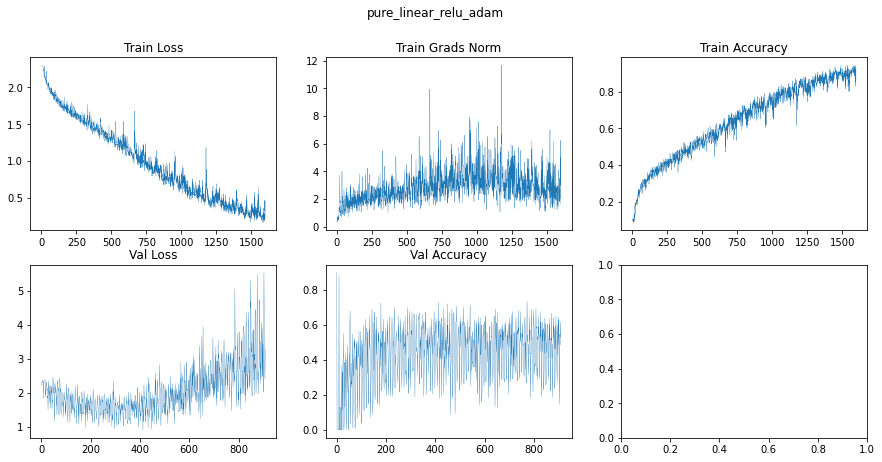

In [66]:
idx = 0
with open('runs/{}/hist.json'.format(names[idx]), 'r') as f:
    hist = json.load(f)
    plot_smth(hist, title=names[idx])

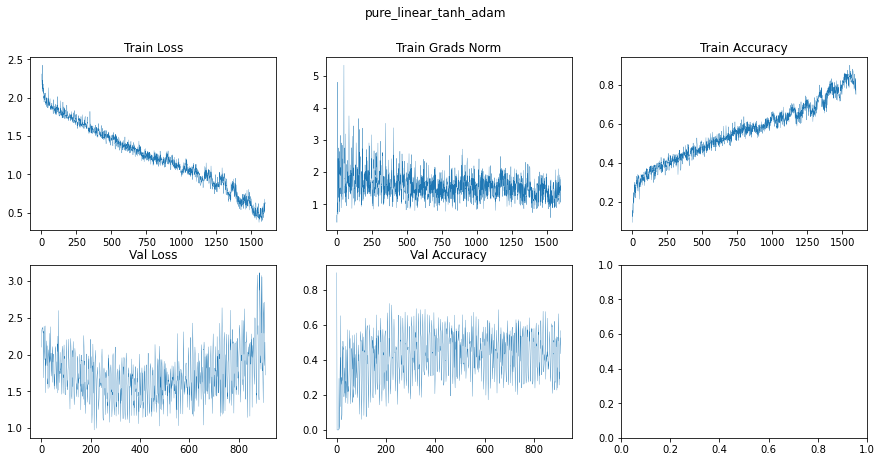

In [67]:
idx = 1
with open('runs/{}/hist.json'.format(names[idx]), 'r') as f:
    hist = json.load(f)
    plot_smth(hist, title=names[idx])

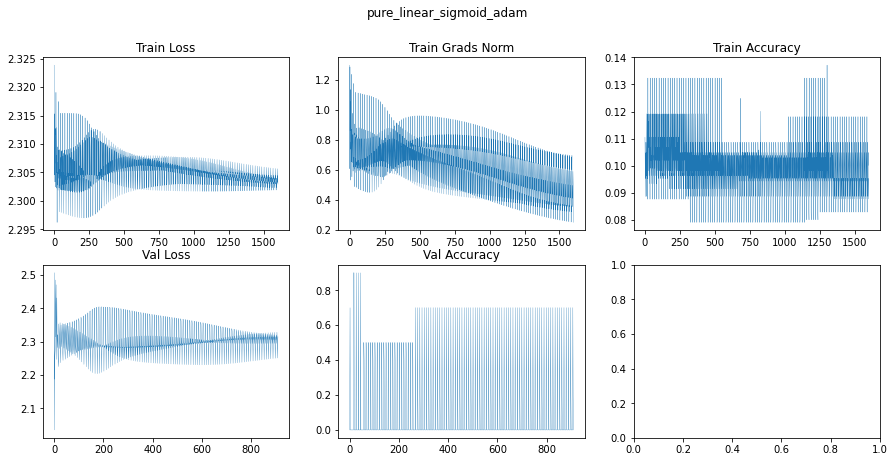

In [68]:
idx = 2
with open('runs/{}/hist.json'.format(names[idx]), 'r') as f:
    hist = json.load(f)
    plot_smth(hist, title=names[idx])

## Now, compare Adam with SGD

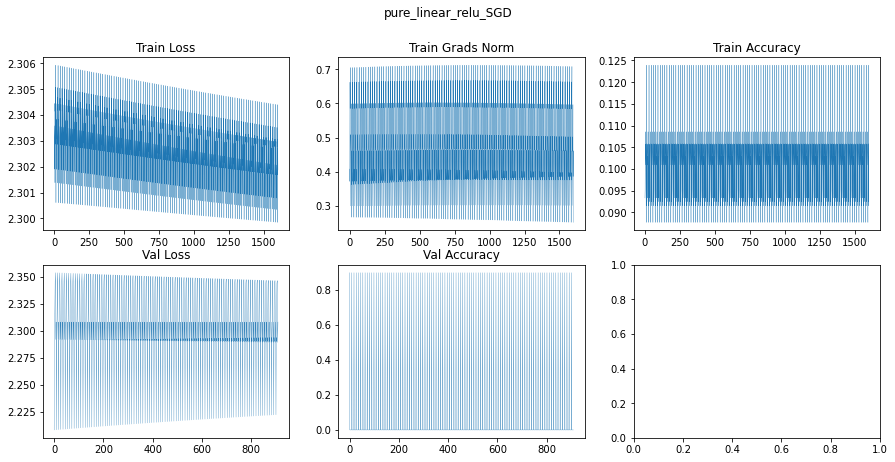

In [69]:
idx = 3
with open('runs/{}/hist.json'.format(names[idx]), 'r') as f:
    hist = json.load(f)
    plot_smth(hist, title=names[idx])

## The same, but with Batch Normalization

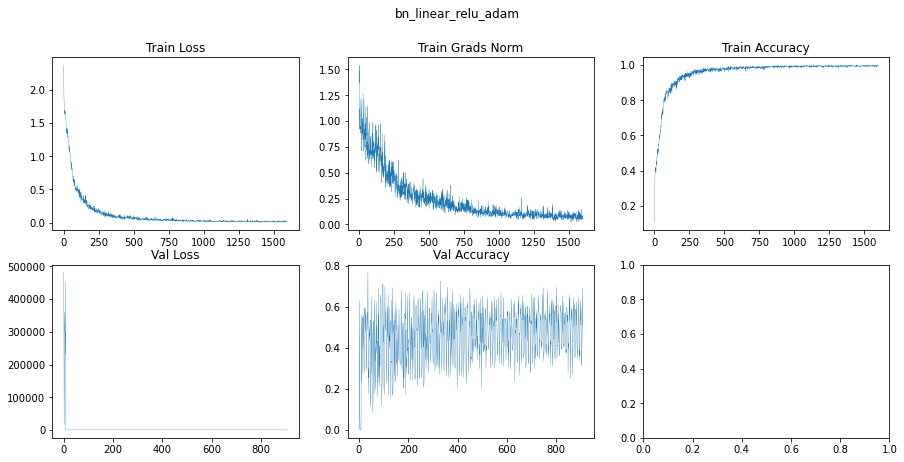

In [70]:
idx = 4
with open('runs/{}/hist.json'.format(names[idx]), 'r') as f:
    hist = json.load(f)
    plot_smth(hist, title=names[idx])

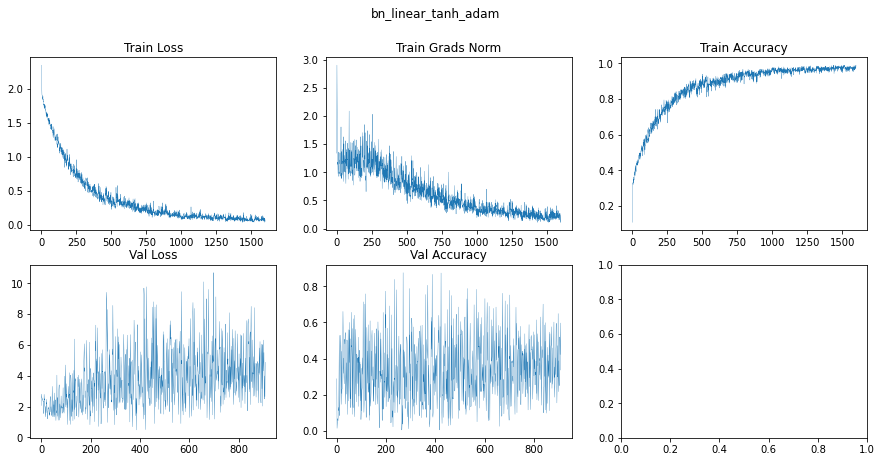

In [71]:
idx = 5
with open('runs/{}/hist.json'.format(names[idx]), 'r') as f:
    hist = json.load(f)
    plot_smth(hist, title=names[idx])

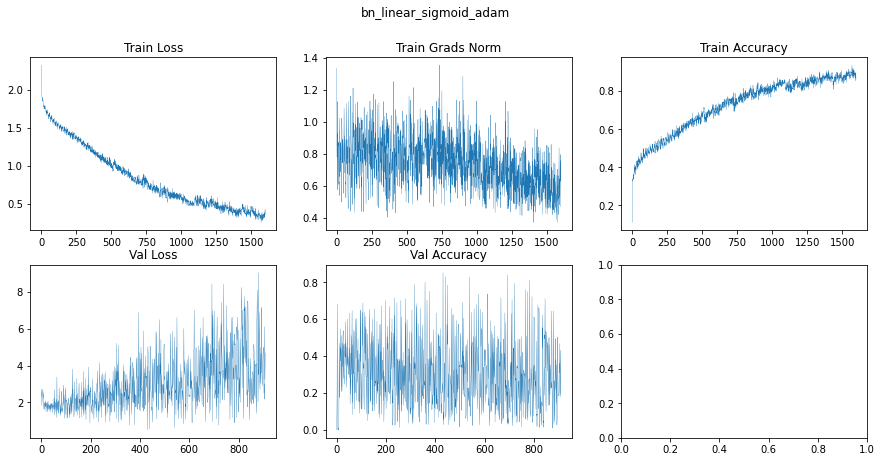

In [72]:
idx = 6
with open('runs/{}/hist.json'.format(names[idx]), 'r') as f:
    hist = json.load(f)
    plot_smth(hist, title=names[idx])

## Batch Norm with Dropout

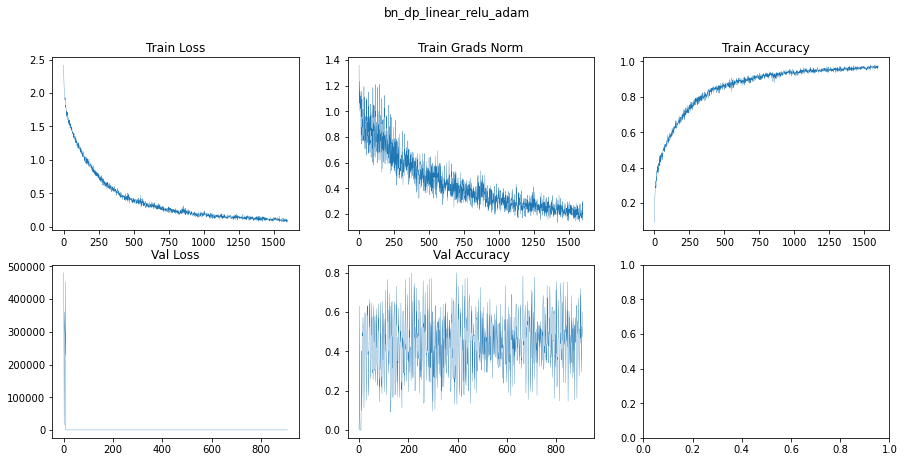

In [73]:
idx = 7
with open('runs/{}/hist.json'.format(names[idx]), 'r') as f:
    hist = json.load(f)
    plot_smth(hist, title=names[idx])

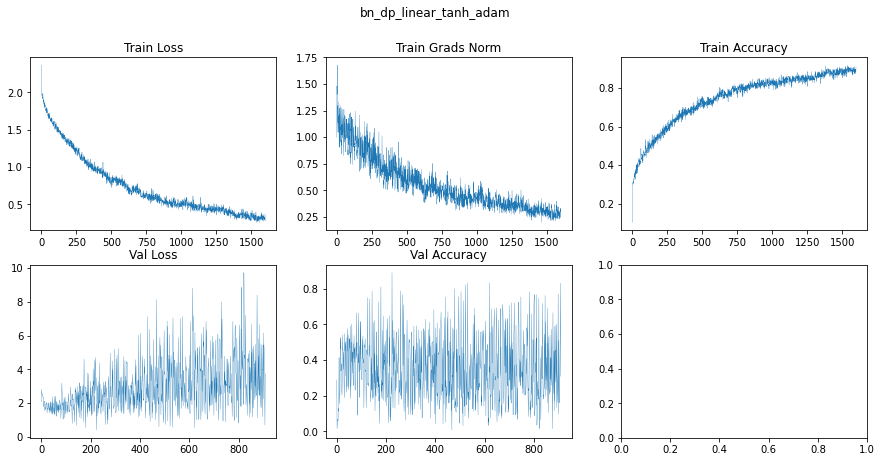

In [74]:
idx = 8
with open('runs/{}/hist.json'.format(names[idx]), 'r') as f:
    hist = json.load(f)
    plot_smth(hist, title=names[idx])

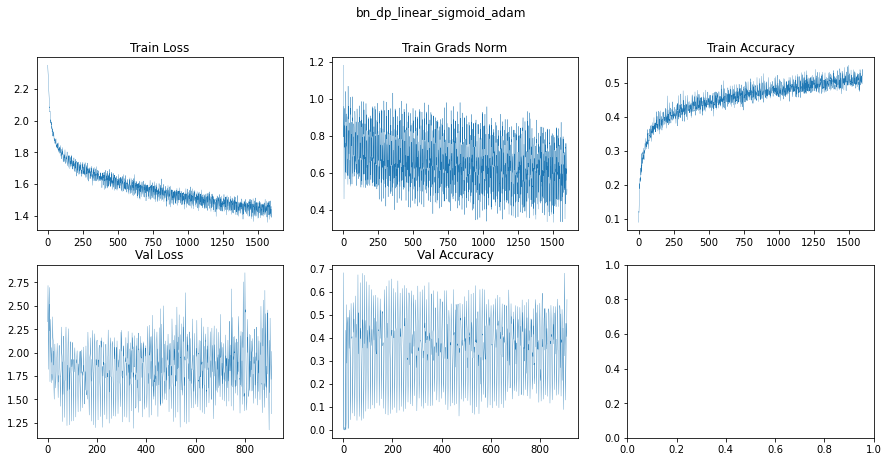

In [75]:
idx = 9
with open('runs/{}/hist.json'.format(names[idx]), 'r') as f:
    hist = json.load(f)
    plot_smth(hist, title=names[idx])

# Conclusions

1. With this approach (only linear layers) I  have reached ~60% accuracy on the validation subset. This is slightly better than 10% accuracy with random classifier. 
2. Batch Normalization really helps model to converge faster and deal with wanishing gradient problem (especially with sigmoid-like activations).
3. DropOut and literally every kind of regularization useless when you use inappropriate kind of architecture (linear instead of convolutional)